This notebook will do EDA to help answer some questions and further refine others.
EDA topics:
   1) price vs year sold -- groupby year sold, average price -- DONE
   2) price vs zipcode -- groupby zipcode, average price -- DONE
   3) price vs year built -- groupby year, average price -- DONE
   4) price vs zestimate -- DONE
   5) price vs days on zillow (recently sold only) -- histogram
   6) number of outliers of price (calculate IQR and get values beyond)
   7) average(price/zestimate) vs zipcode (recently sold only) -- line graph (shows value over/under per zipcode)
   8) days on zillow vs pageviews and favorites -- DONE
   9) pageviews and favorites vs price/zestimate

In [100]:
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter, AutoDateLocator
import plotly.express as px
import seaborn as sns

pd.options.display.max_columns = None

In [101]:
'''
Function to calculate outliers and return list of outliers and non-outliers.
'''

def outliers(sortedList: pd.DataFrame):

    outlierBoolean = []

    Q1 = np.percentile(sortedList, 25)
    Q3 = np.percentile(sortedList, 75)
    IQR = Q3 - Q1

    upperBound = Q3 + 1.5*IQR
    lowerBound = Q1 - 1.5*IQR

    for value in sortedList:
        if (value < lowerBound or value > upperBound):
            outlierBoolean.append(1)
        else:
            outlierBoolean.append(0)

    return outlierBoolean

In [102]:
'''
Read in csv files.
'''


df_forSale = pd.read_csv('cleaned_forSale_data.csv', index_col=0)
df_recentlySold = pd.read_csv('cleaned_recentlySold_data.csv', index_col=0)

df_recentlySold['dateSold'] = pd.to_datetime(df_recentlySold['dateSoldString'])
df_recentlySold.drop('dateSoldString', axis=1, inplace=True)

In [103]:
'''
Check for outliers in list price and sold price.
'''

soldPrice = df_recentlySold['price'].sort_values()
outlierBoolean = outliers(soldPrice)
df_recentlySold.insert(5, "priceOutlier", outlierBoolean, True)

listPrice = df_forSale['price'].sort_values()
outlierBoolean = outliers(listPrice)
df_forSale.insert(4, "priceOutlier", outlierBoolean, True)

In [104]:
'''
Correlation heatmap
'''

# corrplot = sns.heatmap(df_forSale.corr(), cmap="YlGnBu", annot=True)


'\nCorrelation heatmap\n'

In [105]:
'''
Plot price per year sold on scatter plot
'''

# fig, ax = plt.subplots(figsize =(18, 7))

# # Scatter plot for non-outliers
# ax.scatter(
#     x=df_recentlySold[df_recentlySold['priceOutlier'] == 0]['dateSold'],
#     y=df_recentlySold[df_recentlySold['priceOutlier'] == 0]['price'],
#     label='Non-Outlier'
# )

# # Scatter plot for outliers
# ax.scatter(
#     x=df_recentlySold[df_recentlySold['priceOutlier'] == 1]['dateSold'],
#     y=df_recentlySold[df_recentlySold['priceOutlier'] == 1]['price'],
#     label='Outlier'
# )

# # Set the frequency of x-axis ticks (e.g., every 7 days)
# ax.xaxis.set_major_locator(AutoDateLocator(interval_multiples=True))
# ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.yticks(np.arange(df_recentlySold['price'].min(), df_recentlySold['price'].max(), 500000))
# plt.ylabel('Sold Price')
# plt.xlabel('Date Sold')
# plt.legend(('non-outlier','outlier'), loc='upper right')
# plt.show()

'\nPlot price per year sold on scatter plot\n'

In [106]:
'''
Plot price per year sold on scatter plot
'''

# fig, ax = plt.subplots(figsize =(18, 7))

# # Scatter plot for non-outliers
# ax.scatter(
#     x=df_forSale[df_forSale['priceOutlier'] == 0]['timeOnZillow.1'],
#     y=df_forSale[df_forSale['priceOutlier'] == 0]['price'],
#     label='Non-Outlier'
# )

# # Scatter plot for outliers
# ax.scatter(
#     x=df_forSale[df_forSale['priceOutlier'] == 1]['timeOnZillow.1'],
#     y=df_forSale[df_forSale['priceOutlier'] == 1]['price'],
#     label='Outlier'
# )

# # Set the frequency of x-axis ticks (e.g., every 7 days)
# plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
# plt.yticks(np.arange(df_forSale['price'].min(), df_forSale['price'].max(), 500000))
# plt.ylabel('List Price')
# plt.xlabel('Days On Market')
# plt.legend(('non-outlier','outlier'), loc='upper right')
# plt.show()

'\nPlot price per year sold on scatter plot\n'

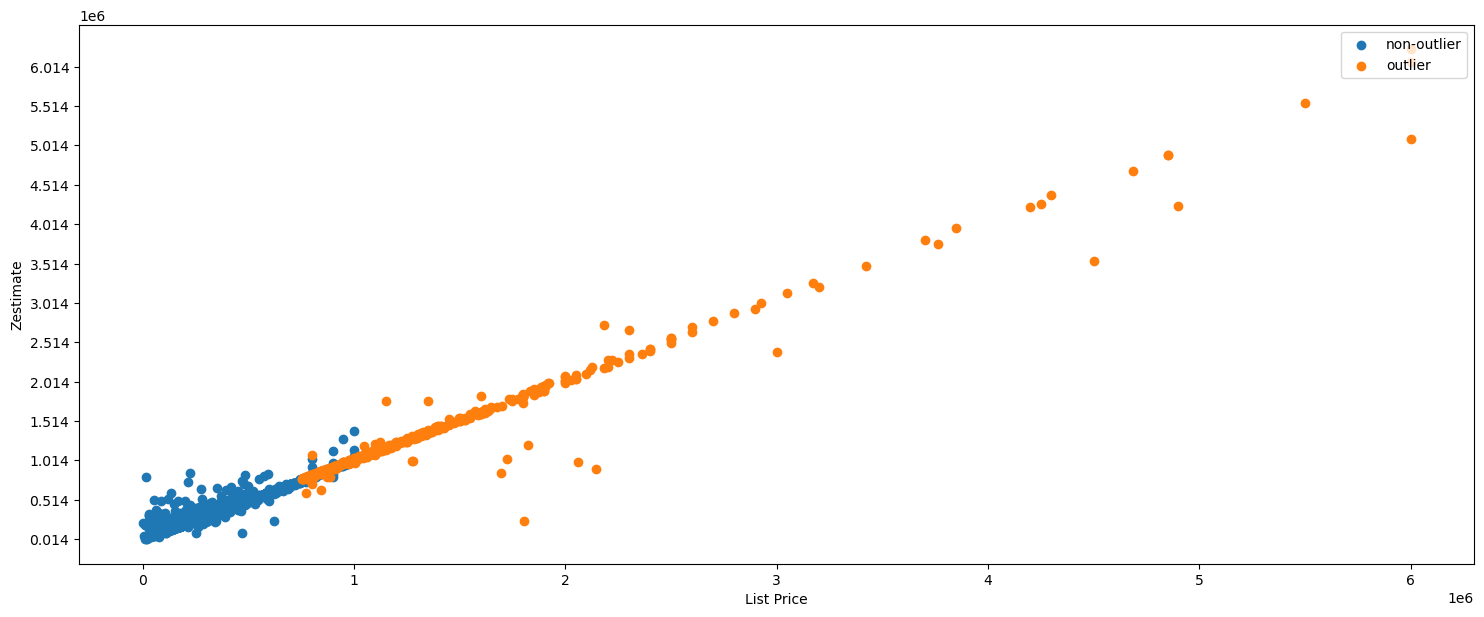

In [107]:
'''
Plot price per year sold on scatter plot
'''

fig, ax = plt.subplots(figsize =(18, 7))

# Scatter plot for non-outliers
ax.scatter(
    x=df_recentlySold[df_recentlySold['priceOutlier'] == 0]['price'],
    y=df_recentlySold[df_recentlySold['priceOutlier'] == 0]['zestimate'],
    label='Non-Outlier'
)

# Scatter plot for outliers
ax.scatter(
    x=df_recentlySold[df_recentlySold['priceOutlier'] == 1]['price'],
    y=df_recentlySold[df_recentlySold['priceOutlier'] == 1]['zestimate'],
    label='Outlier'
)

plt.yticks(np.arange(df_recentlySold['zestimate'].min(), df_recentlySold['zestimate'].max(), 500000))
plt.ylabel('Zestimate')
plt.xlabel('List Price')
plt.legend(('non-outlier','outlier'), loc='upper right')
plt.show()

# Thoughts
- The plot above shows how the zestimate over estimates the value of a house for non-outliers and under estimates the value for outliers.
- Consider adding error bars where needed when looking at zestimate. Upper bound is average of over-estimation here. Lower bound of error bar is average of under-estimation here.

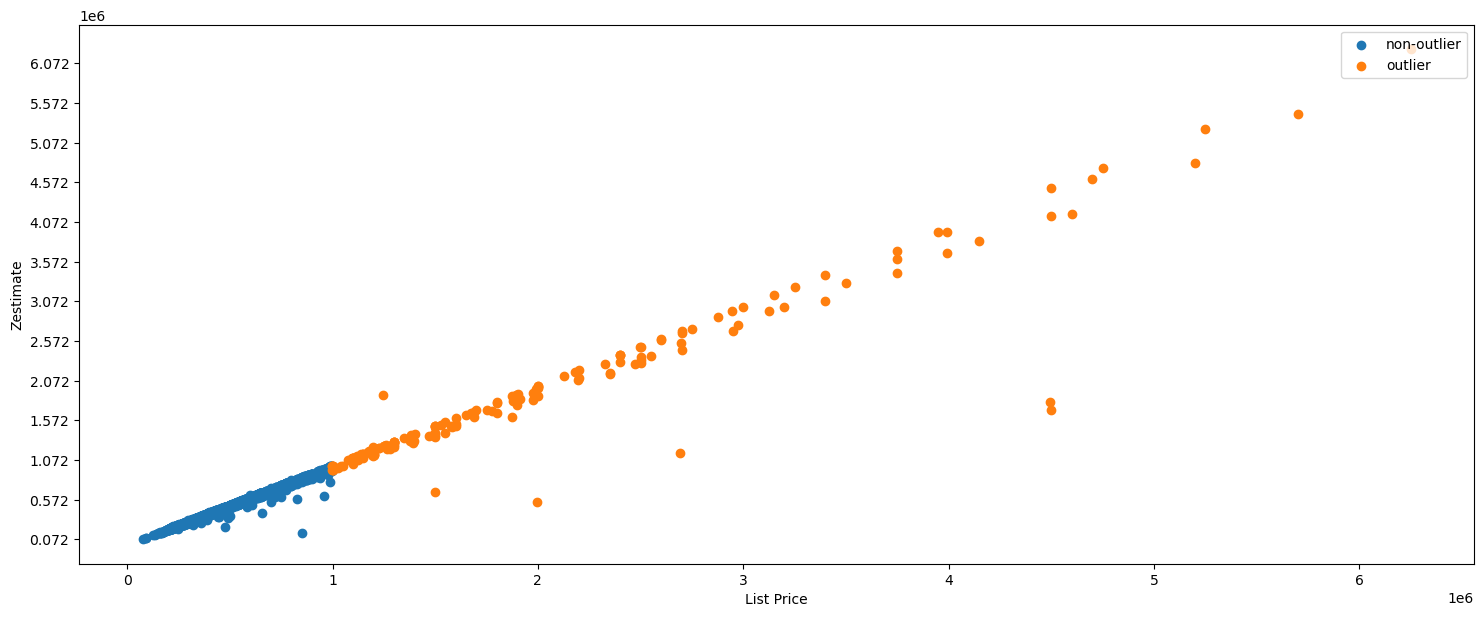

In [108]:
'''
Plot price per year sold on scatter plot
'''

fig, ax = plt.subplots(figsize =(18, 7))

# Scatter plot for non-outliers
ax.scatter(
    x=df_forSale[df_forSale['priceOutlier'] == 0]['price'],
    y=df_forSale[df_forSale['priceOutlier'] == 0]['zestimate'],
    label='Non-Outlier'
)

# Scatter plot for outliers
ax.scatter(
    x=df_forSale[df_forSale['priceOutlier'] == 1]['price'],
    y=df_forSale[df_forSale['priceOutlier'] == 1]['zestimate'],
    label='Outlier'
)

plt.yticks(np.arange(df_forSale['zestimate'].min(), df_forSale['zestimate'].max(), 500000))
plt.ylabel('Zestimate')
plt.xlabel('List Price')
plt.legend(('non-outlier','outlier'), loc='upper right')
plt.show()

# Thoughts
- Notice the difference between this plot and the one for recently sold properties. The zestimate basically follows the list price 1:1. Once sold, however, the zestimate is proved to be a slightly high over-estimation, on average.
- This relationship needs to be called out and discussed in the final outcome.

In [109]:
'''
Groupby average list price vs date sold. Only look at non-outliers
'''

# fig, ax = plt.subplots(figsize =(18, 7))

# data = pd.DataFrame()

# data = df_forSale['price'].loc[df_forSale['priceOutlier']==0].groupby(df_forSale['timeOnZillow.1']).mean().reset_index()
# # data = df_forSale['price'].groupby(df_forSale['timeOnZillow.1']).mean().reset_index()

# data.rename(columns={'price':'averagePrice','timeOnZillow.1':'daysOnZillow'}, inplace=True)
# # data.sort_values(by='averagePrice', ascending=False, inplace=True)
# data.sort_values(by='daysOnZillow', ascending=True, inplace=True)
# data.reset_index(inplace=True)
# data['daysOnZillow'] = data['daysOnZillow'].apply(str)

# ax.bar(x=data['daysOnZillow'], height=data['averagePrice'])
# plt.xticks(rotation=45)
# plt.ylabel('Average Price')
# plt.xlabel('Days On Market')
# plt.show()

# del data

'\nGroupby average list price vs date sold. Only look at non-outliers\n'

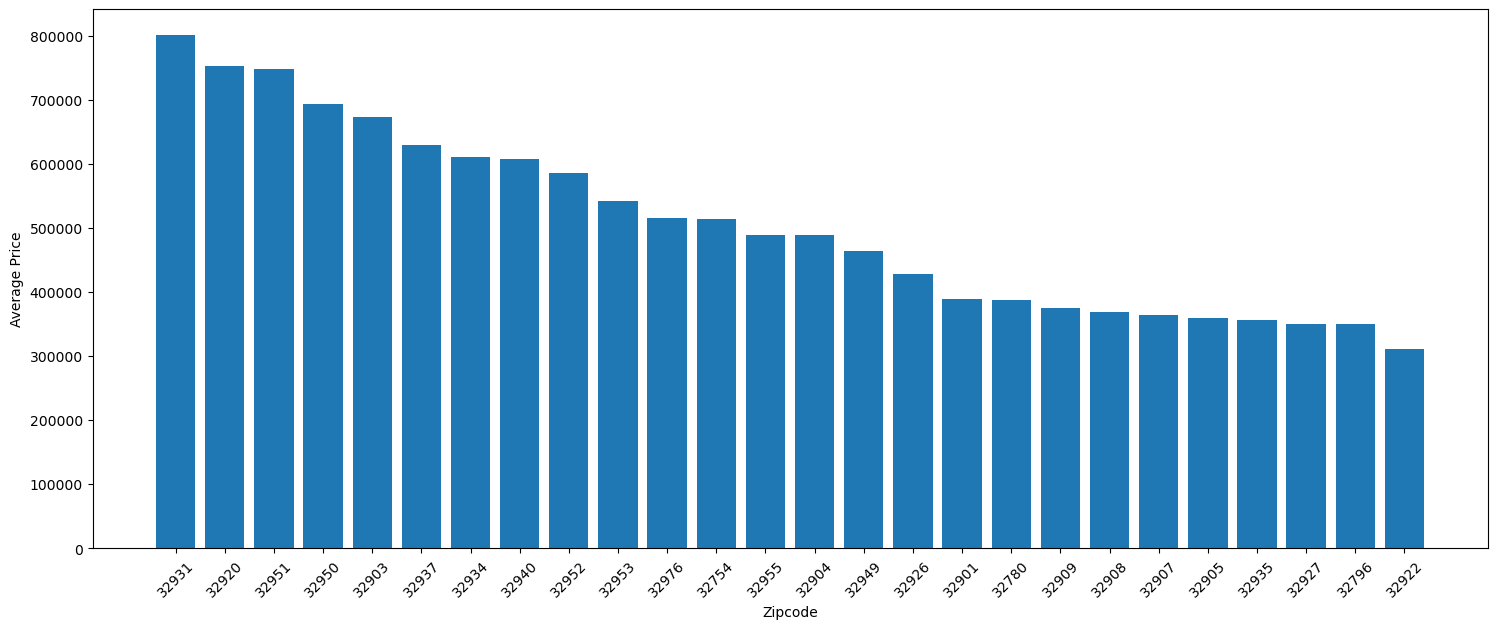

In [110]:
'''
Groupby average list price vs zipcode. Only look at non-outliers
'''

fig, ax = plt.subplots(figsize =(18, 7))

data = pd.DataFrame()

data = df_forSale['price'].loc[df_forSale['priceOutlier']==0].groupby(df_forSale['zipcode']).mean().reset_index()
# data = df_forSale['price'].groupby(df_forSale['zipcode']).mean().reset_index()

data.rename(columns={'price':'averagePrice'}, inplace=True)
data.sort_values(by='averagePrice', ascending=False, inplace=True)
data.reset_index(inplace=True)
data['zipcode'] = data['zipcode'].apply(str)

ax.bar(x=data['zipcode'], height=data['averagePrice'])
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.xlabel('Zipcode')
plt.show()

del data

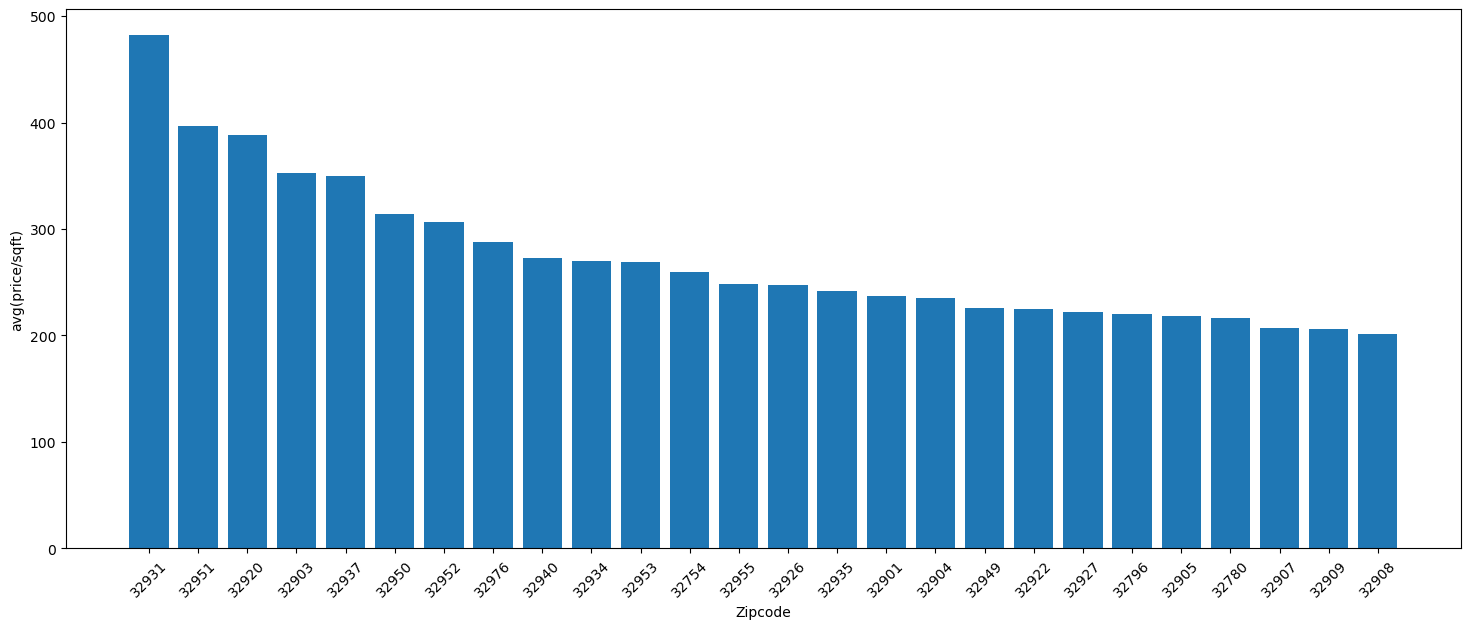

In [111]:
'''
Groupby average list price vs zipcode. Only look at non-outliers
'''

fig, ax = plt.subplots(figsize =(18, 7))

data = pd.DataFrame()

data = df_forSale['price/sqft'].loc[df_forSale['priceOutlier']==0].groupby(df_forSale['zipcode']).mean().reset_index()
# data = df_forSale['price/sqft'].groupby(df_forSale['zipcode']).mean().reset_index()

data.sort_values(by='price/sqft', ascending=False, inplace=True)
data.reset_index(inplace=True)
data['zipcode'] = data['zipcode'].apply(str)

ax.bar(x=data['zipcode'], height=data['price/sqft'])
plt.xticks(rotation=45)
plt.ylabel('avg(price/sqft)')
plt.xlabel('Zipcode')
plt.show()

del data

In [112]:
'''
Choropleth map of average price per zipcode. Make bubbles the size of price. label bubbles.
'''

# fig = px.choropleth(data)

# fig.show()

# del data

'\nChoropleth map of average price per zipcode. Make bubbles the size of price. label bubbles.\n'

In [113]:
'''
Groupby average list price vs year built. Only look at non-outliers
'''

# fig, ax = plt.subplots(figsize =(18, 7))

# data = pd.DataFrame()

# data = df_forSale['price'].loc[df_forSale['priceOutlier']==0].groupby(df_forSale['yearBuilt']).mean().reset_index()
# # data = df_forSale['price'].groupby(df_forSale['yearBuilt']).mean().reset_index()

# data.rename(columns={'price':'averagePrice'}, inplace=True)
# data.sort_values(by='yearBuilt', ascending=True, inplace=True)
# data.reset_index(inplace=True)
# data['yearBuilt'] = data['yearBuilt'].apply(str)

# ax.bar(x=data['yearBuilt'], height=data['averagePrice'])
# plt.xticks(rotation=45)
# plt.ylabel('Average Price')
# plt.xlabel('Year Built')
# plt.show()

# del data

'\nGroupby average list price vs year built. Only look at non-outliers\n'

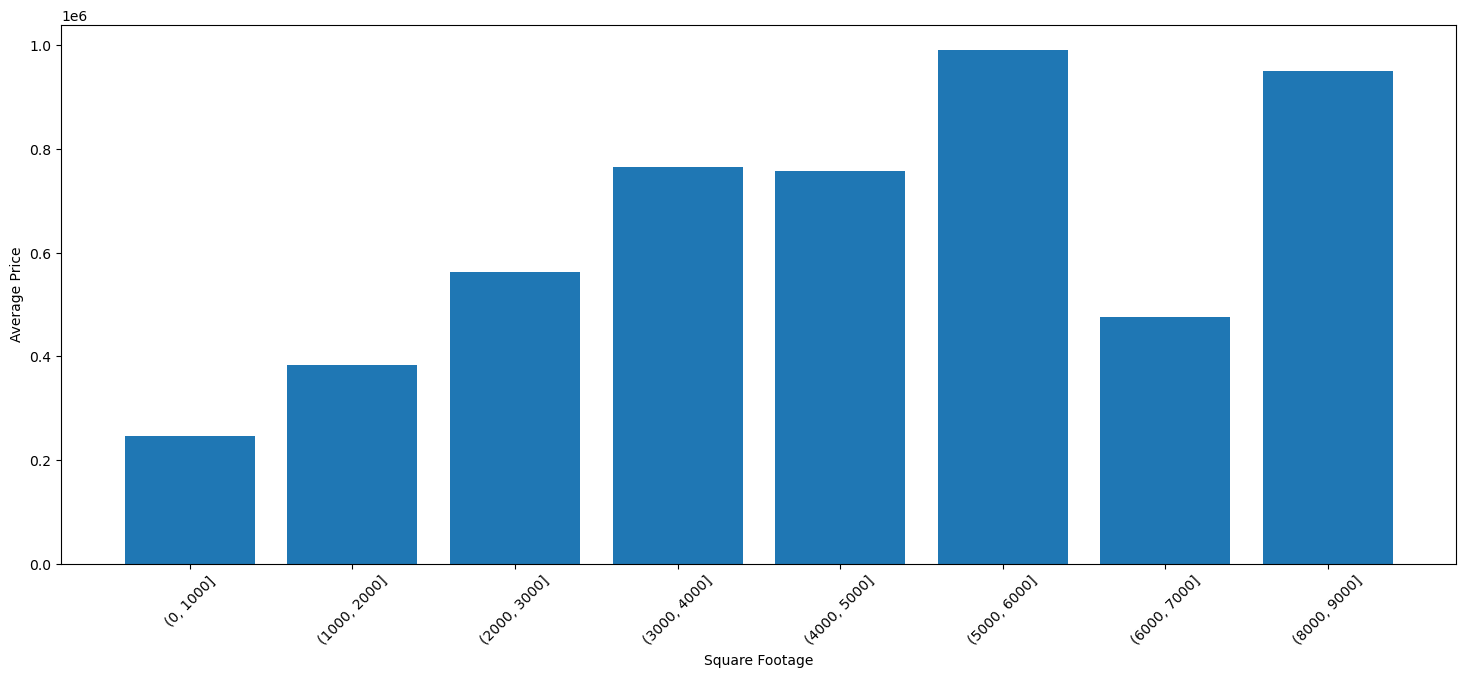

In [114]:
'''
Groupby average square feet vs average price. Only look at non-outliers
'''

fig, ax = plt.subplots(figsize =(18, 7))

data = pd.DataFrame()

data = df_forSale['price'].loc[df_forSale['priceOutlier']==0].groupby(pd.cut(df_forSale['livingAreaValue'], list(range(0, 10001, 1000)))).mean().reset_index()
# data = df_forSale['price'].groupby(pd.cut(df_forSale['livingAreaValue'], list(range(0, 10001, 1000)))).mean().reset_index()

'''
Open Interval = (x,y) -> from x to y but not including either x or y
Closed Interval = [x,y] -> from x to y while also inlcuding x and y
'''

data.dropna(subset=['price'], inplace=True)

data.rename(columns={'price':'averagePrice'}, inplace=True)

data.reset_index(inplace=True)
data['livingAreaValue'] = data['livingAreaValue'].apply(str)

ax.bar(x=data['livingAreaValue'], height=data['averagePrice'])
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.xlabel('Square Footage')
plt.show()

del data

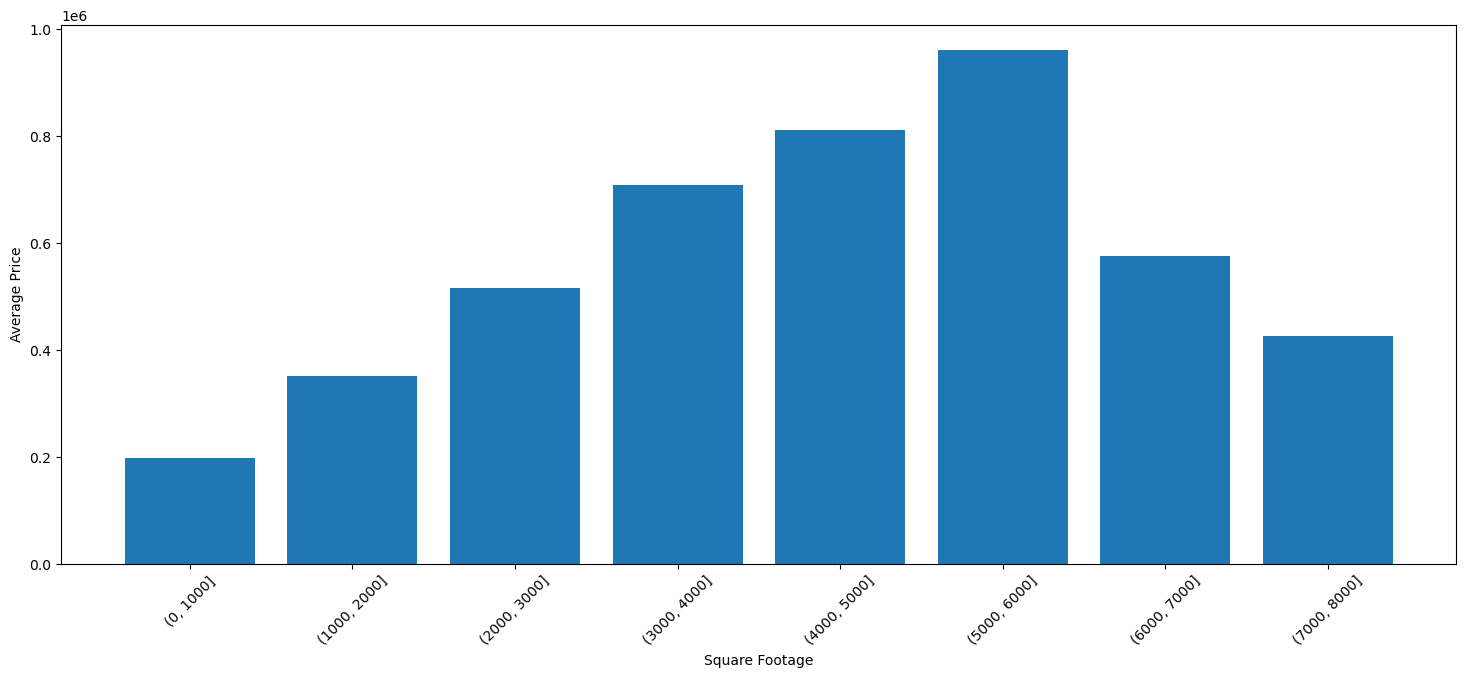

In [115]:
'''
Groupby average square feet vs average sold price. Only look at non-outliers
'''

fig, ax = plt.subplots(figsize =(18, 7))

data = pd.DataFrame()

data = df_recentlySold['price'].loc[df_recentlySold['priceOutlier']==0].groupby(pd.cut(df_recentlySold['livingAreaValue'], list(range(0, 10001, 1000)))).mean().reset_index()
# data = df_recentlySold['price'].groupby(pd.cut(df_recentlySold['livingAreaValue'], list(range(0, 10001, 1000)))).mean().reset_index()

'''
Open Interval = (x,y) -> from x to y but not including either x or y
Closed Interval = [x,y] -> from x to y while also inlcuding x and y
'''

data.dropna(subset=['price'], inplace=True)

data.rename(columns={'price':'averagePrice'}, inplace=True)

data.reset_index(inplace=True)
data['livingAreaValue'] = data['livingAreaValue'].apply(str)

ax.bar(x=data['livingAreaValue'], height=data['averagePrice'])
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.xlabel('Square Footage')
plt.show()

del data

In [116]:
'''
Groupby average sold price vs year built. Only look at non-outliers
'''

# fig, ax = plt.subplots(figsize =(18, 7))

# data = pd.DataFrame()

# data = df_recentlySold['yearBuilt'].loc[df_recentlySold['priceOutlier']==0].groupby(pd.cut(df_recentlySold['livingAreaValue'], list(range(0, 10001, 1000)))).mean().reset_index()
# # data = df_recentlySold['yearBuilt'].groupby(pd.cut(df_recentlySold['livingAreaValue'], list(range(0, 10001, 1000)))).mean().reset_index()

# '''
# Open Interval = (x,y) -> from x to y but not including either x or y
# Closed Interval = [x,y] -> from x to y while also inlcuding x and y
# '''

# data.dropna(subset=['yearBuilt'], inplace=True)

# data.reset_index(inplace=True)
# data['livingAreaValue'] = data['livingAreaValue'].apply(str)

# ax.bar(x=data['livingAreaValue'], height=data['yearBuilt'])
# plt.xticks(rotation=45)
# plt.ylim([data['yearBuilt'].min()-1, data['yearBuilt'].max()+1])
# plt.ylabel('avg(Year Built)')
# plt.xlabel('Square Footage')
# plt.show()

# del data

'\nGroupby average sold price vs year built. Only look at non-outliers\n'

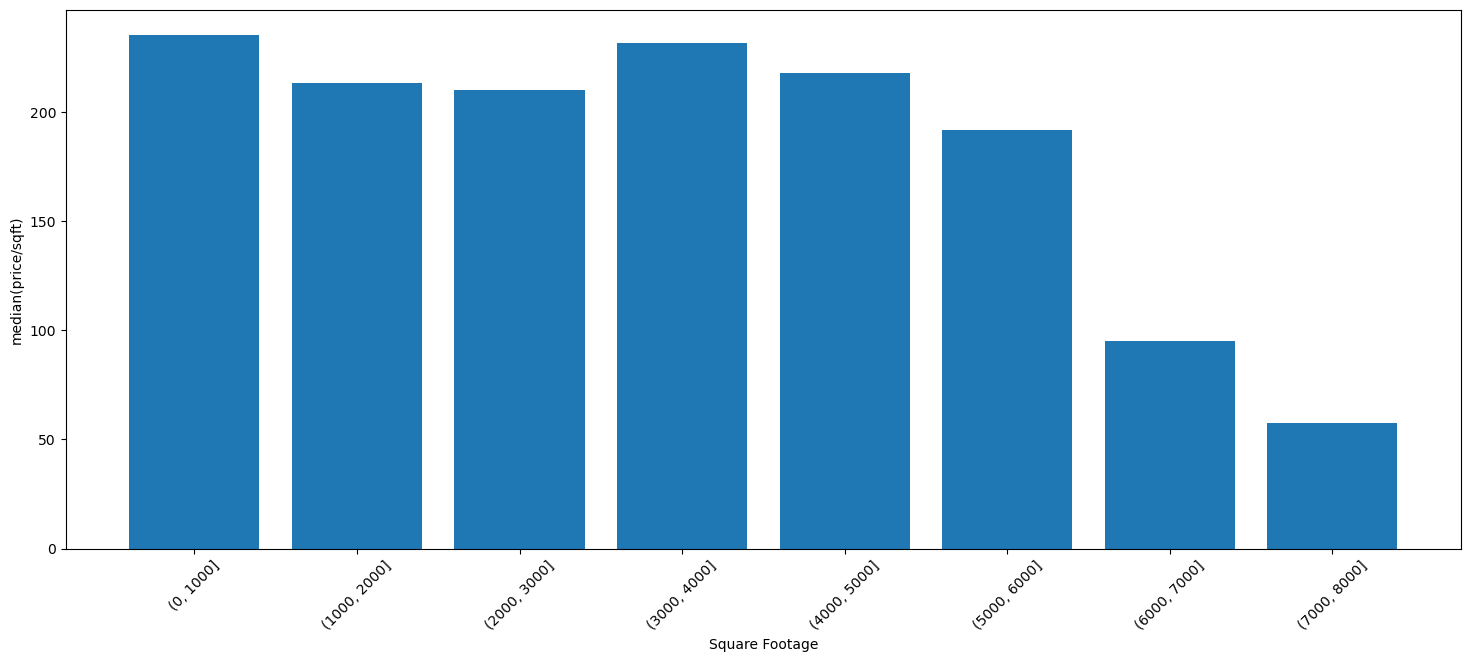

In [117]:
'''
Groupby average square foot vs average sold price/sqft. Only look at non-outliers
'''

fig, ax = plt.subplots(figsize =(18, 7))

data = pd.DataFrame()

data = df_recentlySold['price/sqft'].loc[df_recentlySold['priceOutlier']==0].groupby(pd.cut(df_recentlySold['livingAreaValue'], list(range(0, 10001, 1000)))).median().reset_index()
# data = df_recentlySold['price/sqft'].groupby(pd.cut(df_recentlySold['livingAreaValue'], list(range(0, 10001, 1000)))).median().reset_index()

'''
Open Interval = (x,y) -> from x to y but not including either x or y
Closed Interval = [x,y] -> from x to y while also inlcuding x and y
'''

data.dropna(subset=['price/sqft'], inplace=True)

data.reset_index(inplace=True)
data['livingAreaValue'] = data['livingAreaValue'].apply(str)

ax.bar(x=data['livingAreaValue'], height=data['price/sqft'])
plt.xticks(rotation=45)
# plt.ylim([data['price/sqft'].min()-1, data['price/sqft'].max()+1])
plt.ylabel('median(price/sqft)')
plt.xlabel('Square Footage')
plt.show()

del data

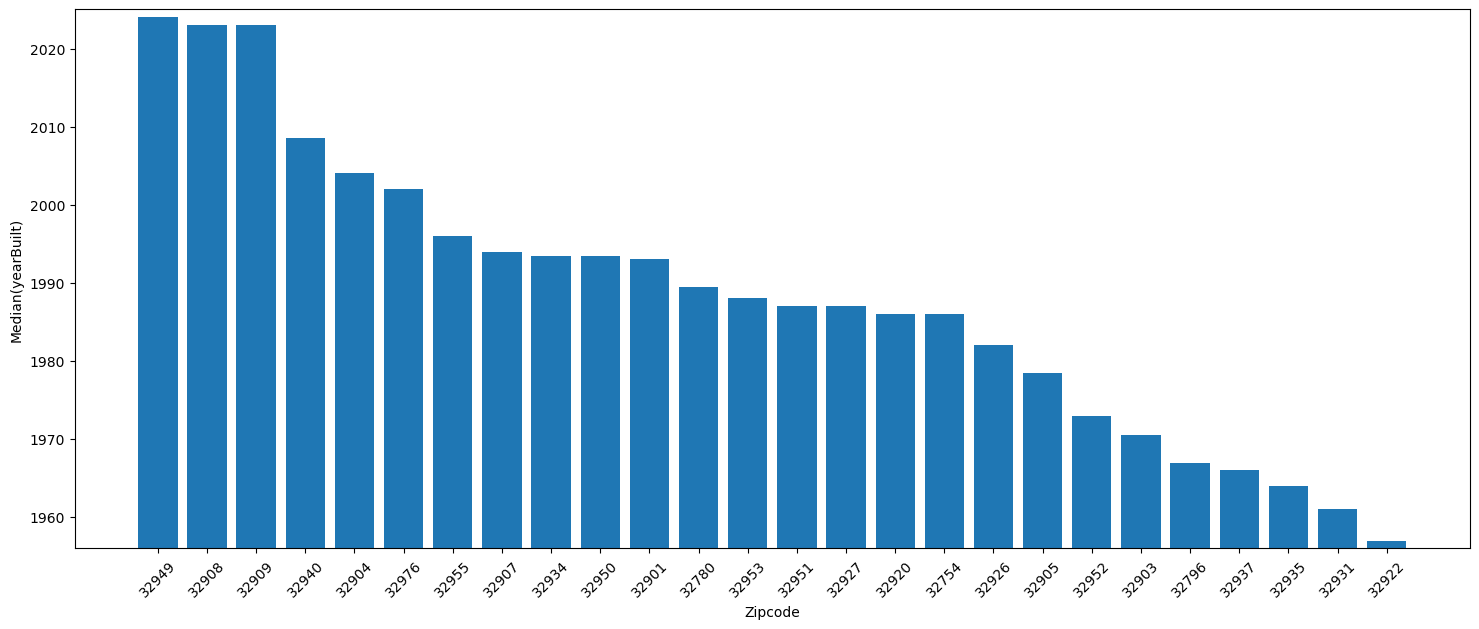

In [118]:
'''
Groupby average zipcode vs average home age. Only look at non-outliers
'''

fig, ax = plt.subplots(figsize =(18, 7))

data = pd.DataFrame()

data = df_forSale['yearBuilt'].loc[df_forSale['priceOutlier']==0].groupby(df_forSale['zipcode']).median().reset_index()
# data = df_forSale['yearBuilt'].groupby(df_forSale['zipcode']).median().reset_index()

data.sort_values(by='yearBuilt', ascending=False, inplace=True)
data.reset_index(inplace=True)
data['zipcode'] = data['zipcode'].apply(str)

ax.bar(x=data['zipcode'], height=data['yearBuilt'])
plt.xticks(rotation=45)
plt.ylim([data['yearBuilt'].min()-1, data['yearBuilt'].max()+1])
plt.ylabel('Median(yearBuilt)')
plt.xlabel('Zipcode')
plt.show()

del data

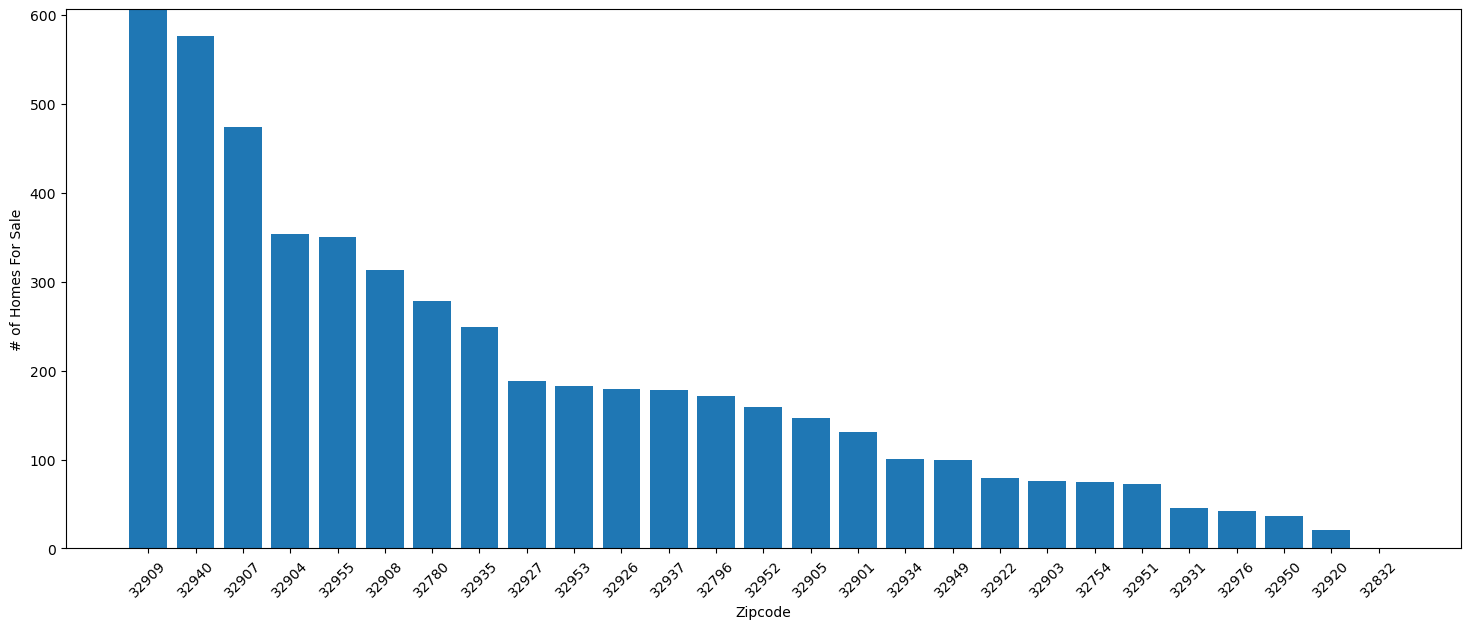

In [119]:
'''
Groupby zipcode vs number of homes for sale. Only look at non-outliers
# sign of how busy the market is.
'''

fig, ax = plt.subplots(figsize =(18, 7))

data = pd.DataFrame()

# data = df_forSale['yearBuilt'].loc[df_forSale['priceOutlier']==0].groupby(df_forSale['zipcode']).count().reset_index()
data = df_recentlySold['yearBuilt'].loc[df_recentlySold['priceOutlier']==0].groupby(df_recentlySold['zipcode']).count().reset_index()
# data = df_forSale['yearBuilt'].groupby(df_forSale['zipcode']).count().reset_index()

data.sort_values(by='yearBuilt', ascending=False, inplace=True)
data.reset_index(inplace=True)
data['zipcode'] = data['zipcode'].apply(str)

ax.bar(x=data['zipcode'], height=data['yearBuilt'])
plt.xticks(rotation=45)
plt.ylim([data['yearBuilt'].min()-1, data['yearBuilt'].max()+1])
plt.ylabel('# of Homes For Sale')
plt.xlabel('Zipcode')
plt.show()

del data

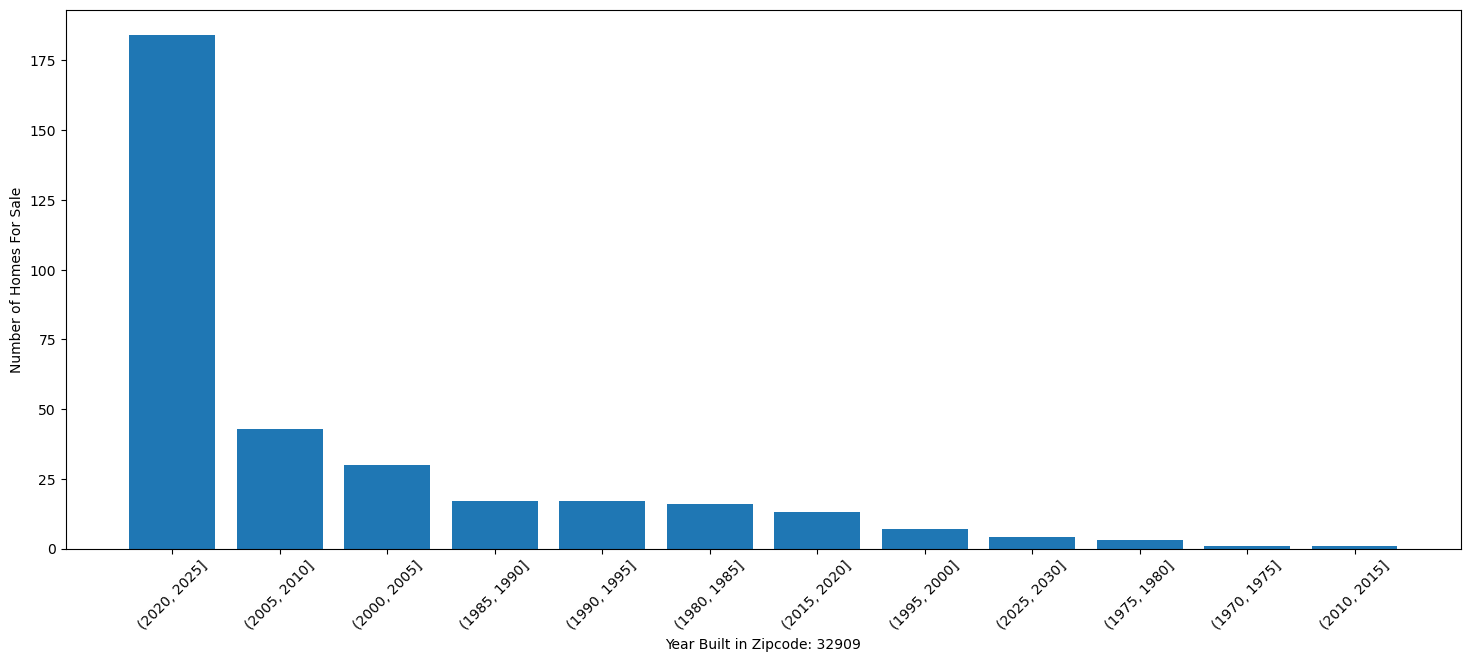

In [120]:
'''
Groupby Year Built vs number of homes for sale. Only look at non-outliers
# sign of how busy the market is.
'''

fig, ax = plt.subplots(figsize =(18, 7))

data = pd.DataFrame()

data = df_forSale['price'].loc[df_forSale['priceOutlier']==0].loc[df_forSale['zipcode']==32909].groupby(pd.cut(df_forSale['yearBuilt'], list(range(1970, 2031, 5)))).count().reset_index()
# data = df_recentlySold['price'].loc[df_recentlySold['priceOutlier']==0].loc[df_recentlySold['zipcode']==32909].groupby(pd.cut(df_recentlySold['yearBuilt'], list(range(1970, 2031, 5)))).count().reset_index()
# data = df_forSale['price'].loc[df_forSale['zipcode']==32909].groupby(pd.cut(df_forSale['yearBuilt'], list(range(1970, 2031, 5)))).count().reset_index()

data.sort_values(by='price', ascending=False, inplace=True)
data.reset_index(inplace=True)
data['yearBuilt'] = data['yearBuilt'].apply(str)

ax.bar(x=data['yearBuilt'], height=data['price'])
plt.xticks(rotation=45)
plt.ylabel('Number of Homes For Sale')
plt.xlabel('Year Built in Zipcode: 32909')
plt.show()

del data

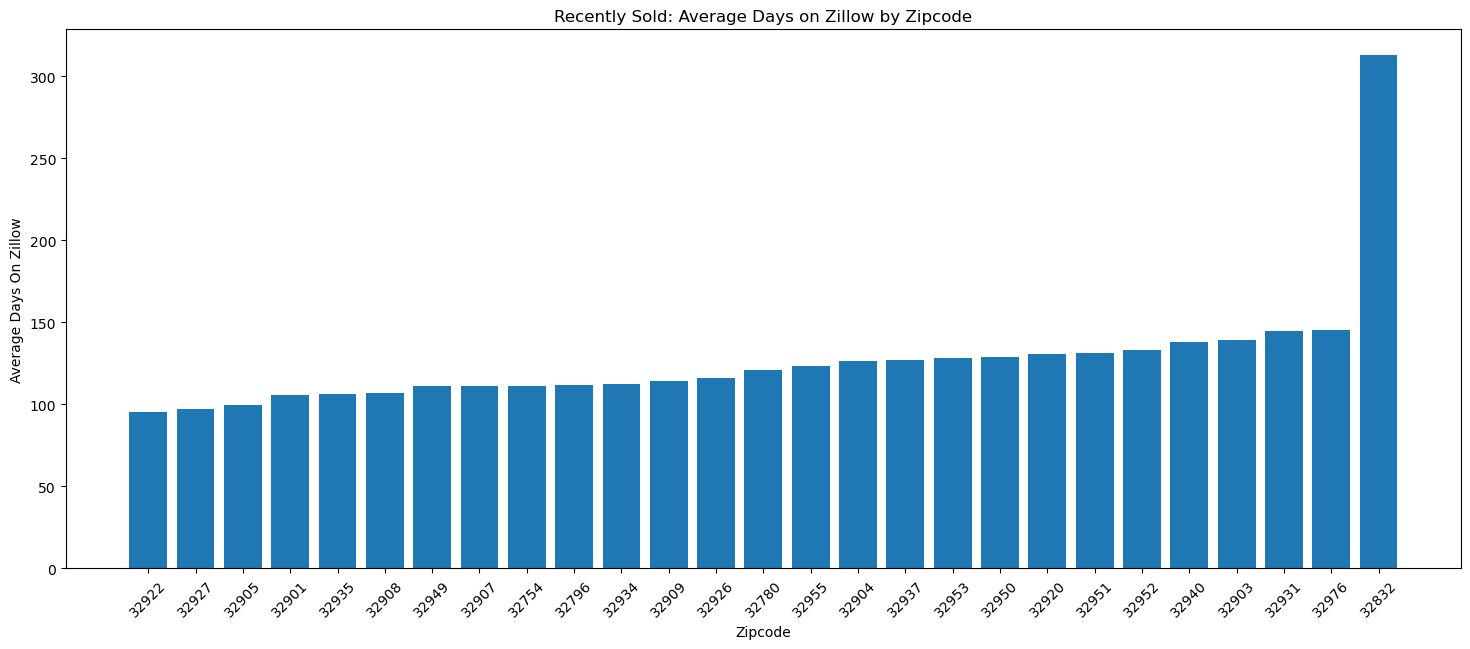

In [121]:
'''
Groupby zipcode vs average days on market. Only look at non-outliers
# sign of how busy the market is.
'''

fig, ax = plt.subplots(figsize =(18, 7))

data = pd.DataFrame()

data = df_recentlySold['daysOnZillow'].loc[df_recentlySold['priceOutlier']==0].groupby(df_recentlySold['zipcode']).mean().reset_index()
# data = df_recentlySold['daysOnZillow'].groupby(df_recentlySold['zipcode']).count().reset_index()

data.sort_values(by='daysOnZillow', ascending=True, inplace=True)
data.reset_index(inplace=True)
data['zipcode'] = data['zipcode'].apply(str)

ax.bar(x=data['zipcode'], height=data['daysOnZillow'])
plt.xticks(rotation=45)
# plt.ylim([data['yearBuilt'].min()-1, data['yearBuilt'].max()+1])
plt.ylabel('Average Days On Zillow')
plt.xlabel('Zipcode')
plt.title('Recently Sold: Average Days on Zillow by Zipcode')
plt.show()

del data

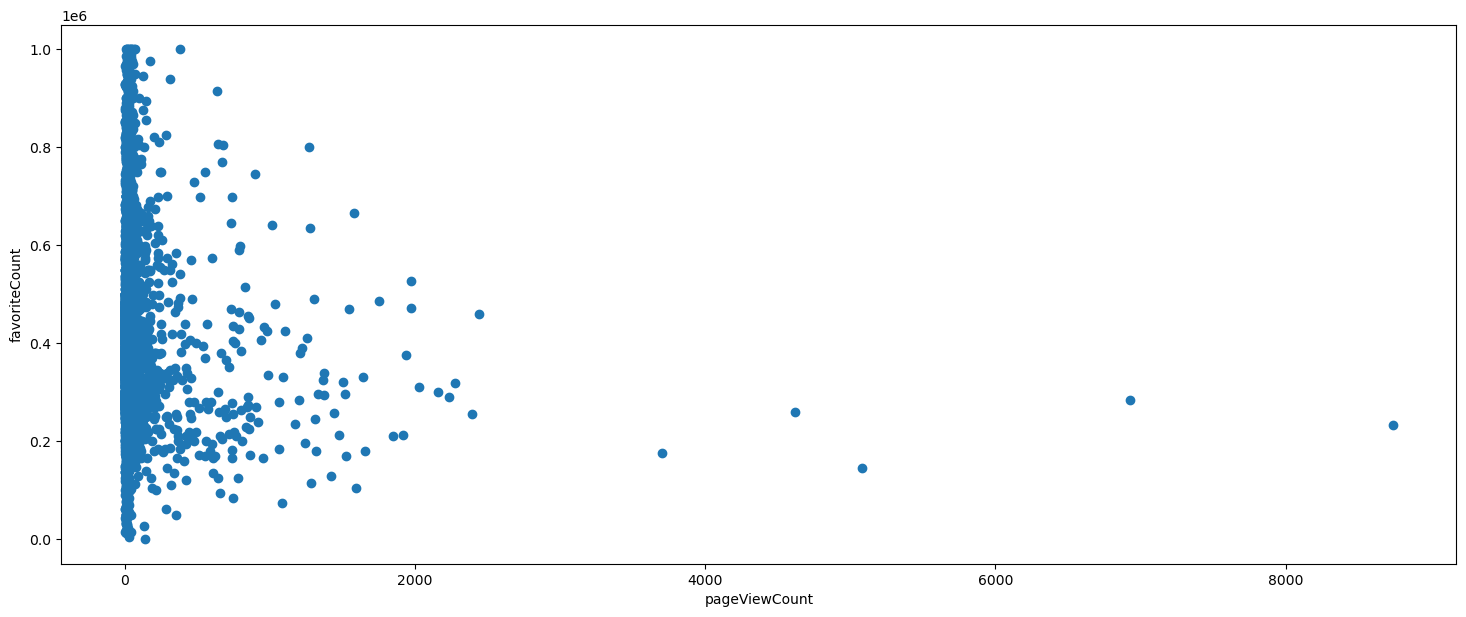

In [130]:
'''
Scatter plot - days on zillow vs page views with color by favorites
'''

fig, ax = plt.subplots(figsize =(18, 7))

# Scatter plot for non-outliers
ax.scatter(
    x=df_recentlySold[df_recentlySold['priceOutlier'] == 0]['pageViewCount'],
    y=df_recentlySold[df_recentlySold['priceOutlier'] == 0]['price'],
    label='Outlier'
)

plt.ylabel('favoriteCount')
plt.xlabel('pageViewCount')
plt.show()
